# Data_gen v2

In [2]:
import pandas as pd
import uuid
import random
import numpy as np


In [3]:

def generate_data_v2(n_samples=5000) -> pd.DataFrame:
    data = []
    regions = ['North', 'South', 'East', 'West', 'Central']
    payment_methods = ['Credit Card', 'Debit Card', 'PayPal', 'Bank Transfer', 'Cash']
    delivery_options = ['Standard', 'Express', 'Same Day', 'Pickup']
    
    for i in range(n_samples):
        client_id = i
        age = min(95, max(18, round(np.random.normal(40, 15))))
        gender = random.choice(['M', 'F'])
        region = random.choices(regions, weights=[0.2, 0.3, 0.2, 0.2, 0.1])[0]
        
        # Determine article type based on age and gender
        if age >= 50:
            article_type = random.choices(
                ['Home Decor', 'Electronics', 'Clothing'],
                weights=[0.2, 0.7, 0.1] if gender == 'M' else [0.2, 0.1, 0.7]
            )[0]
        elif age <= 40:
            article_type = random.choices(
                ['Toys', 'Electronics', 'Clothing'],
                weights=[0.3, 0.6, 0.1] if gender == 'M' else [0.6, 0.1, 0.3]
            )[0]
        else:
            article_type = random.choice(['Home Decor', 'Toys', 'Electronics', 'Clothing'])

        purchase_amount = round(np.random.normal(50, 20), 2)  # Normally distributed purchase amount
        discount_received = random.choices([True, False], weights=[0.3, 0.7])[0]
        payment_method = random.choices(payment_methods, weights=[0.4, 0.3, 0.2, 0.05, 0.05])[0]
        delivery_option = random.choices(delivery_options, weights=[0.5, 0.3, 0.1, 0.1])[0]
        time_of_purchase = random.randint(0, 23)
        
        # Customer loyalty score
        loyalty_score = round(
            (age / 80) * 100 + (purchase_amount / 200) * 100 + (20 if discount_received else 0) + 
            (10 if article_type in ['Electronics', 'Clothing'] else 0), 
            2
        )
        
        # Adjust trends based on attributes
        if delivery_option == 'Express':
            purchase_amount += 50  # Higher cost for faster delivery
        if payment_method == 'Cash':
            purchase_amount -= 30  # Slightly lower loyalty for cash payments
        
        # make purchase amount bigger when time of purchase is late
        if time_of_purchase >= 20:
            purchase_amount += 60
        elif time_of_purchase >= 15:
            purchase_amount += 30
        
        
        data.append({
            'client_id': str(client_id),
            'age': age,
            'gender': gender,
            'region': region,
            'article_type': article_type,
            'purchase_amount': max(0, purchase_amount),  # Ensure no negative purchase amounts
            'discount_received': discount_received,
            'time_of_purchase': time_of_purchase,
            'payment_method': payment_method,
            'delivery_option': delivery_option,
            'loyalty_score': loyalty_score
        })

    return pd.DataFrame(data)

# Example usage
df = generate_data_v2()
df.head()


,client_id,age,gender,region,article_type,purchase_amount,discount_received,time_of_purchase,payment_method,delivery_option,loyalty_score
0,0,44,F,North,Electronics,49.38,False,5,Credit Card,Express,64.69
1,1,29,F,West,Toys,81.95,False,13,PayPal,Express,52.23
2,2,49,M,South,Home Decor,119.86,False,20,Cash,Express,81.18
3,3,53,M,West,Electronics,102.17,False,23,Debit Card,Standard,97.34
4,4,66,F,South,Clothing,43.86,True,9,Credit Card,Standard,134.43


In [4]:
# def generate_health_data(n_samples=5000) -> pd.DataFrame:
#     data = []
#     for i in range(n_samples):
#         id = i
#         age = max(0, round(np.random.normal(40, 15)))
#         poids = max(0, round(np.random.normal(70, 15)))
#         taille = max(0, round(np.random.normal(170, 10)))
#         genre = random.choice(['M', 'F'])
#         tension = round(np.random.normal(120, 10))
#         cholesterol = round(np.random.normal(200, 20))
#         glucide = round(np.random.normal(100, 10))
        
#         data.append({
#             'id': str(id),
#             'age': age,
#             'poids': poids,
#             'taille': taille,
#             'genre': genre,
#             'tension': tension,
#             'cholesterol': cholesterol,
#             'glucide': glucide
#         })
#     return pd.DataFrame(data)

# df_health = generate_health_data()

In [16]:
def generate_health_data_v2(n_samples=5000) -> pd.DataFrame:
    data = []
    for i in range(n_samples):
        id = i
        age = max(0, round(np.random.normal(40, 15)))
        genre = random.choice(['M', 'F'])
        
        # Height and weight based on gender
        if genre == 'M':
            taille = max(150, round(np.random.normal(175, 10)))
            poids = max(50, round(np.random.normal(80, 15)))
        else:
            taille = max(140, round(np.random.normal(165, 10)))
            poids = max(40, round(np.random.normal(65, 10)))
        
        # Calculate BMI
        bmi = round(poids / (taille / 100) ** 2, 1)
        
        # Health indicators with trends
        tension = round(np.random.normal(120 + age * 0.1, 10))  # Slightly higher tension with age
        cholesterol = round(np.random.normal(200 + age * 0.5, 20))  # Increases with age
        glucide = round(np.random.normal(100 + age * 0.2, 10))  # Slight increase with age
        
        # Adjustments based on BMI
        if bmi > 30:  # Obese
            tension += 10
            cholesterol += 30
            glucide += 20
        elif bmi < 18.5:  # Underweight
            tension -= 5
            cholesterol -= 20
            glucide -= 10
        
        # Gender-based adjustments
        if genre == 'M':
            cholesterol += 10
        else:
            glucide += 5
        
        data.append({
            'id': str(id),
            'age': age,
            'poids': poids,
            'taille': taille,
            'genre': genre,
            'bmi': bmi,
            'tension': max(80, tension),  # Ensure realistic lower bound
            'cholesterol': max(100, cholesterol),  # Ensure realistic lower bound
            'glucide': max(70, glucide)  # Ensure realistic lower bound
        })
    return pd.DataFrame(data)

df_health = generate_health_data_v2()


In [45]:
df.dtypes

client_id             object
age                    int64
gender                object
region                object
article_type          object
purchase_amount      float64
discount_received       bool
time_of_purchase       int64
payment_method        object
delivery_option       object
loyalty_score        float64
dtype: object

In [7]:
import pandas as pd
import numpy as np
import random

def add_numerical_outliers(df, numerical_columns, numerical_outlier_factor=10, outlier_fraction=0.1):
    """
    Adds outliers to the numerical columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to modify.
    numerical_columns (list): List of numerical column names where outliers should be added.
    numerical_outlier_factor (int): Factor to multiply with column values to generate high outliers.
    outlier_fraction (float): Fraction of rows to change to outliers (e.g., 0.1 means 10%).

    Returns:
    pd.DataFrame: The DataFrame with added outliers.
    """
    # Add outliers to numerical columns
    for col in numerical_columns:
        # Get the mean and standard deviation of the column
        mean = df[col].mean()
        std = df[col].std()

        # Decide how many outliers to add
        outliers_count = int(len(df) * outlier_fraction)  # Add outliers to the specified fraction of the rows

        # Add high and low outliers
        for _ in range(outliers_count):
            # Randomly select an index for outlier
            idx = random.randint(0, len(df) - 1)
            # Randomly decide whether to add a high or low outlier
            if random.choice([True, False]):
                # High outlier
                df.at[idx, col] = mean + random.randint(5, 10) * std
            else:
                # Low outlier
                df.at[idx, col] = mean - random.randint(5, 10) * std
    
    return df


In [ ]:
# orders df
# List of numerical columns
numerical_columns = ['age', 'purchase_amount', 'time_of_purchase', 'loyalty_score']

# Add outliers to the numerical columns in the DataFrame
df_with_outliers = add_numerical_outliers(df, numerical_columns, numerical_outlier_factor=10, outlier_fraction=0.001)

# df_with_outliers


In [17]:

# df_health
# List of numerical columns
numerical_columns = ['age', 'poids', 'taille', 'tension', 'cholesterol', 'glucide']

# Add outliers to the numerical columns in the DataFrame
df_health_with_outliers = add_numerical_outliers(df_health, numerical_columns, numerical_outlier_factor=10, outlier_fraction=0.002)

df_health_with_outliers

/tmp/ipykernel_4933/553108380.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '173.46790331836644' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[idx, col] = mean + random.randint(5, 10) * std
/tmp/ipykernel_4933/553108380.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-59.90049858275947' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[idx, col] = mean - random.randint(5, 10) * std
/tmp/ipykernel_4933/553108380.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '103.13930609419518' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[idx, col] = mean - random.randint(5, 10) * std
/tmp/ipykernel_4

,id,age,poids,taille,genre,bmi,tension,cholesterol,glucide
0,0,44.0,84.0,170.0,M,29.1,97.0,212.0,96.0
1,1,49.0,67.0,161.0,F,25.8,112.0,219.0,111.0
2,2,9.0,61.0,166.0,F,22.1,115.0,189.0,102.0
3,3,17.0,60.0,177.0,F,19.2,112.0,220.0,104.0
4,4,38.0,76.0,169.0,F,26.6,137.0,208.0,97.0
...,...,...,...,...,...,...,...,...,...
4995,4995,24.0,52.0,154.0,F,21.9,115.0,233.0,105.0
4996,4996,55.0,88.0,171.0,M,30.1,133.0,262.0,124.0
4997,4997,64.0,67.0,158.0,M,26.8,130.0,234.0,123.0
4998,4998,34.0,70.0,162.0,F,26.7,116.0,241.0,121.0


In [9]:
import pandas as pd
import numpy as np
import random

def insert_random_nan(df, nan_percentage=0.1):
    """
    Insert random NaN values into a DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    nan_percentage (float): The percentage of NaN values to insert. E.g., 0.1 for 10%.

    Returns:
    pd.DataFrame: The DataFrame with random NaN values inserted.
    """
    # Calculate the number of NaNs to insert
    total_cells = df.size
    nan_cells = int(total_cells * nan_percentage)

    # Get random indices
    indices = [(random.randint(0, df.shape[0] - 1), random.randint(0, df.shape[1] - 1)) for _ in range(nan_cells)]

    # Insert NaN values at those indices
    for row, col in indices:
        df.iloc[row, col] = np.nan
        
    # Delete some rows by setting them to NaN
    n_rows_to_delete = random.randint(0, 10)
    rows_to_delete = random.sample(range(df.shape[0]), n_rows_to_delete)
    df.iloc[rows_to_delete] = np.nan

    return df


In [10]:
df_with_nans = insert_random_nan(df, nan_percentage=0.01)
df_with_nans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          4949 non-null   object 
 1   age                4938 non-null   float64
 2   gender             4945 non-null   object 
 3   region             4941 non-null   object 
 4   article_type       4937 non-null   object 
 5   purchase_amount    4934 non-null   float64
 6   discount_received  4943 non-null   object 
 7   time_of_purchase   4941 non-null   float64
 8   payment_method     4936 non-null   object 
 9   delivery_option    4931 non-null   object 
 10  loyalty_score      4951 non-null   float64
dtypes: float64(4), object(7)
memory usage: 429.8+ KB


/tmp/ipykernel_4933/551130779.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.iloc[row, col] = np.nan


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'purchase_amount'}>],
       [<Axes: title={'center': 'time_of_purchase'}>,
        <Axes: title={'center': 'loyalty_score'}>]], dtype=object)

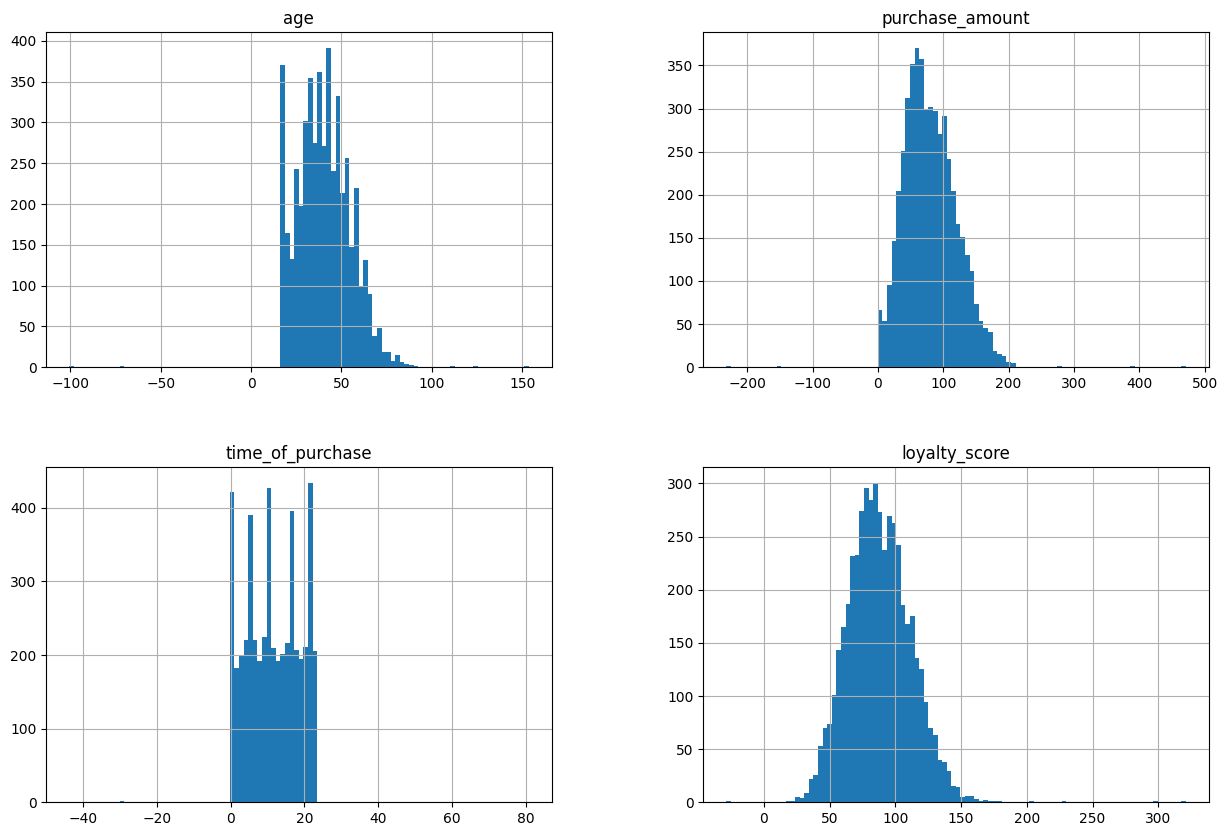

In [50]:
df.hist(figsize=(15, 10), bins=100)

In [53]:
df.to_csv('10.0_data.csv', index=False)

# Outliers

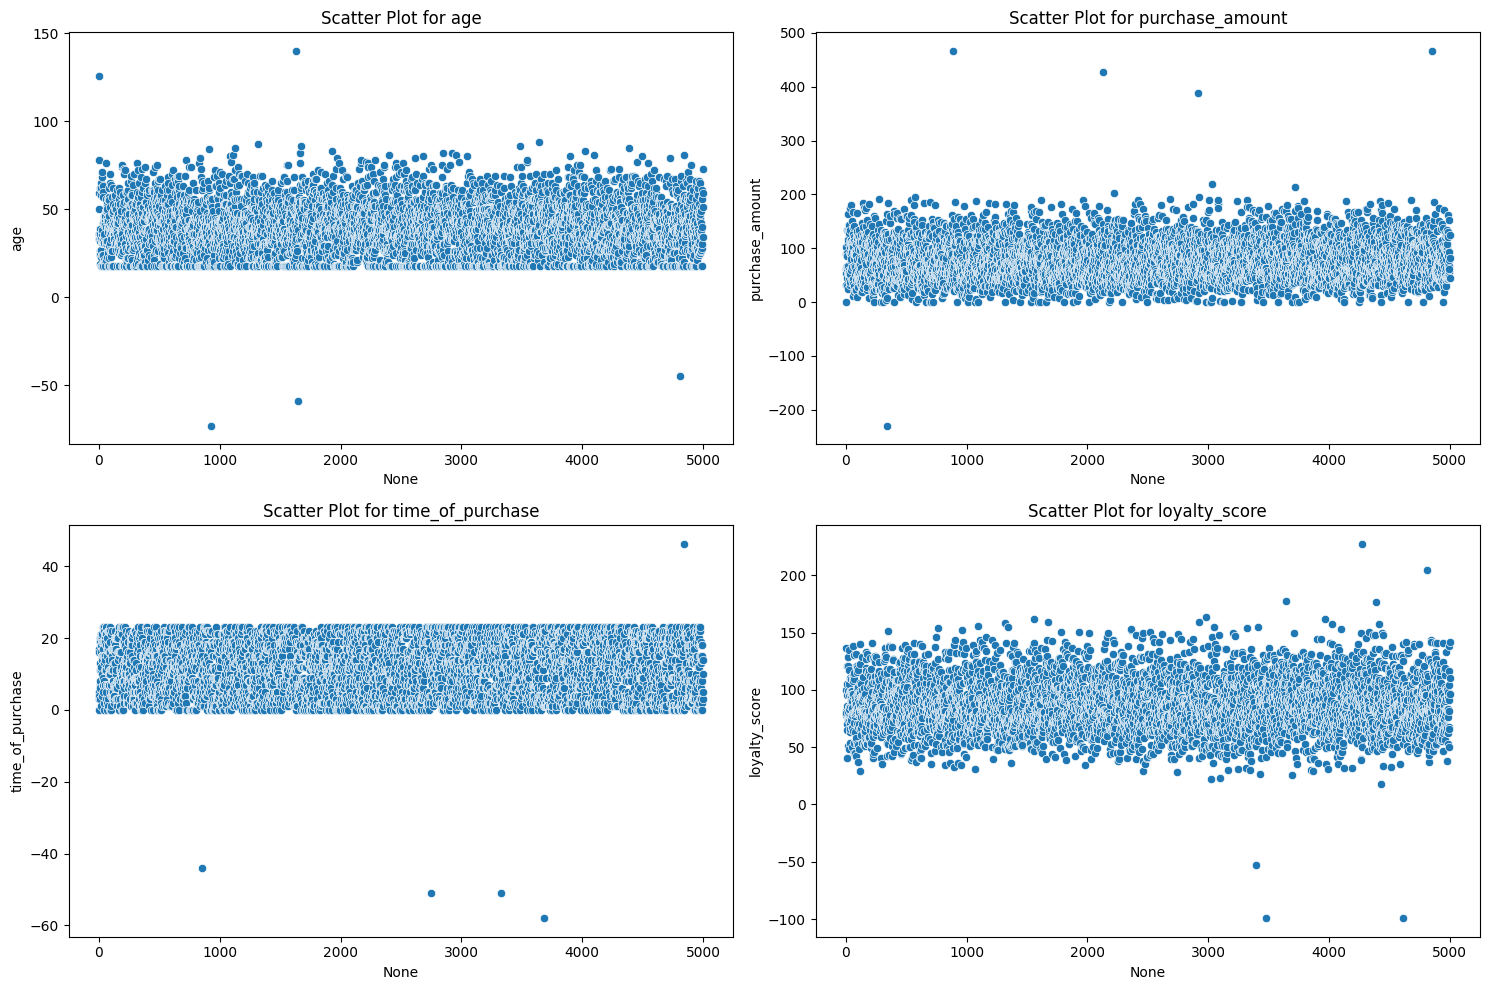

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

col = 'purchase_amount'
cols = ['age', 'purchase_amount', 'time_of_purchase', 'loyalty_score']

# make subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# plot histograms
for i, col in enumerate(cols):
    sns.scatterplot(x=df.index, y=df[col], data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Scatter Plot for {col}')
    
plt.tight_layout()
plt.show()

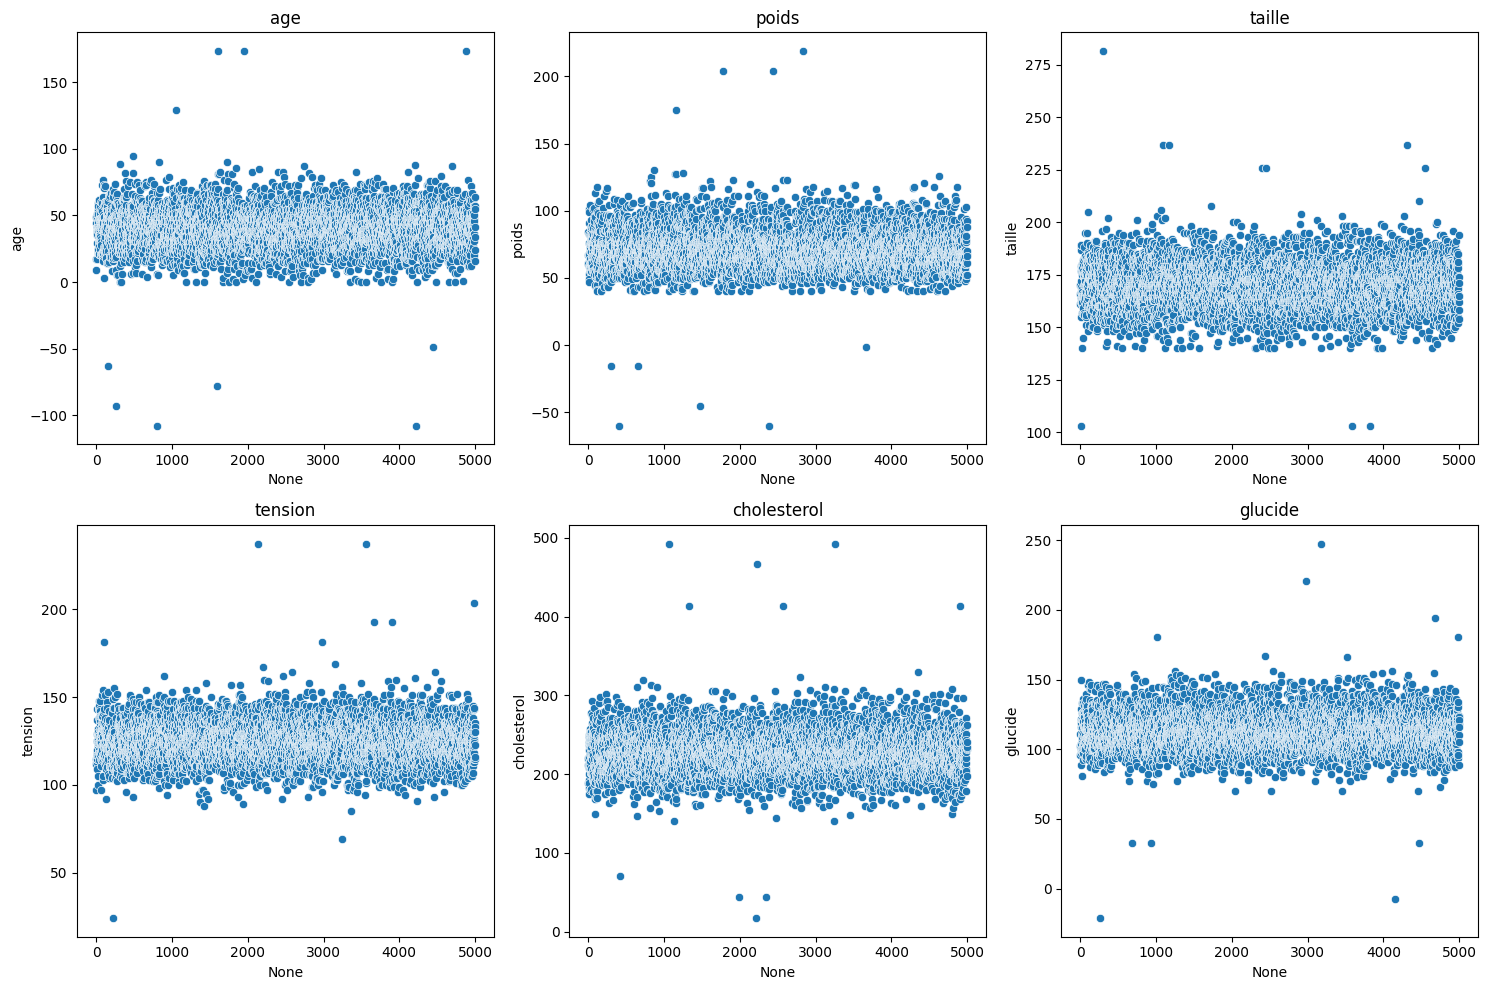

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age', 'poids', 'taille', 'tension', 'cholesterol', 'glucide']

# make subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# plot histograms
for i, col in enumerate(cols):
    sns.scatterplot(x=df_health.index, y=df_health[col], data=df_health, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col}')
    
plt.tight_layout()
plt.show()

In [34]:
# Age outliers ith z-scores 

# Calculate the z-score for each value in the 'age' column
z_scores = (df['age'] - df['age'].mean()) / df['age'].std()

# Find the indices of rows where the z-score is greater than 3 or less than -3
outlier_indices = z_scores[(z_scores < -3) | (z_scores > 3)].index

# Display the rows with outliers
print(df.loc[outlier_indices])

# Remove outliers
df_no_age_outliers = df.drop(outlier_indices)

,client_id,age,gender,region,article_type,purchase_amount,discount_received,time_of_purchase,payment_method,delivery_option,loyalty_score,age_outlier,purchase_amount_outlier,time_of_purchase_outlier,loyalty_score_outlier
5,5,125.583170,M,East,Toys,102.25,False,4.0,PayPal,Express,79.88,True,False,False,False
908,908,84.000000,F,South,Clothing,106.71,False,5.0,Debit Card,Express,143.36,True,False,False,False
930,930,-72.808427,F,East,Toys,113.47,False,8.0,Credit Card,Express,71.73,True,False,False,False
1125,1125,85.000000,F,South,Clothing,152.47,False,23.0,Credit Card,Express,137.49,True,False,False,False
1321,1321,87.000000,F,East,Clothing,69.63,True,19.0,Credit Card,Standard,158.56,True,False,False,False
1630,1630,139.753998,F,North,Toys,140.42,False,19.0,Debit Card,Express,67.71,True,False,False,False
1648,1648,-58.637598,M,East,Electronics,35.57,True,11.0,PayPal,Standard,135.28,True,False,False,False
1670,1670,86.000000,M,West,Clothing,114.22,False,16.0,PayPal,Same Day,159.61,True,False,False,True
3488,3488,86.000000,M,South,Home Decor,39.54,False,0.0,PayPal,Same Day,127.27,True,False,False,False
3640,3640,88.000000,M,East,Electronics,135.03,True,20.0,PayPal,Same Day,177.52,True,False,False,True


In [35]:
# purchase_amount outliers With IQR

# Calculate the first and third quartiles
Q1 = df['purchase_amount'].quantile(0.25)
Q3 = df['purchase_amount'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Find the indices of rows where the purchase_amount is an outlier
outlier_indices = df[(df['purchase_amount'] < Q1 - 1.5 * IQR) | (df['purchase_amount'] > Q3 + 1.5 * IQR)].index

# Display the rows with outliers
print(df.loc[outlier_indices])

# Remove outliers
df_no_purchase_amount_outliers = df.drop(outlier_indices)

,client_id,age,gender,region,article_type,purchase_amount,discount_received,time_of_purchase,payment_method,delivery_option,loyalty_score,age_outlier,purchase_amount_outlier,time_of_purchase_outlier,loyalty_score_outlier
342,342,18.0,F,South,Toys,-229.395694,True,5.0,Credit Card,Express,64.05,False,True,False,False
570,570,41.0,F,West,Home Decor,194.970000,False,22.0,Credit Card,Express,93.73,False,False,False,False
884,884,46.0,M,South,Electronics,466.208353,False,23.0,Debit Card,Standard,101.19,False,True,False,False
2129,2129,51.0,F,South,Clothing,427.563684,False,5.0,Debit Card,Standard,97.81,False,True,False,False
2224,2224,68.0,F,East,Clothing,202.060000,False,22.0,Credit Card,Express,141.03,False,True,False,False
2914,2914,44.0,F,East,Electronics,388.919014,False,6.0,Credit Card,Standard,105.33,False,True,False,False
2926,2926,33.0,M,North,Toys,194.940000,True,20.0,Credit Card,Express,103.72,False,False,False,False
3030,3030,18.0,F,South,Toys,218.710000,False,20.0,Debit Card,Express,76.85,False,True,False,False
3721,3721,52.0,F,North,Home Decor,214.190000,False,23.0,NaN,Express,117.09,False,True,False,False
4850,4850,55.0,M,North,Electronics,466.208353,False,9.0,Credit Card,Express,96.53,False,True,False,False


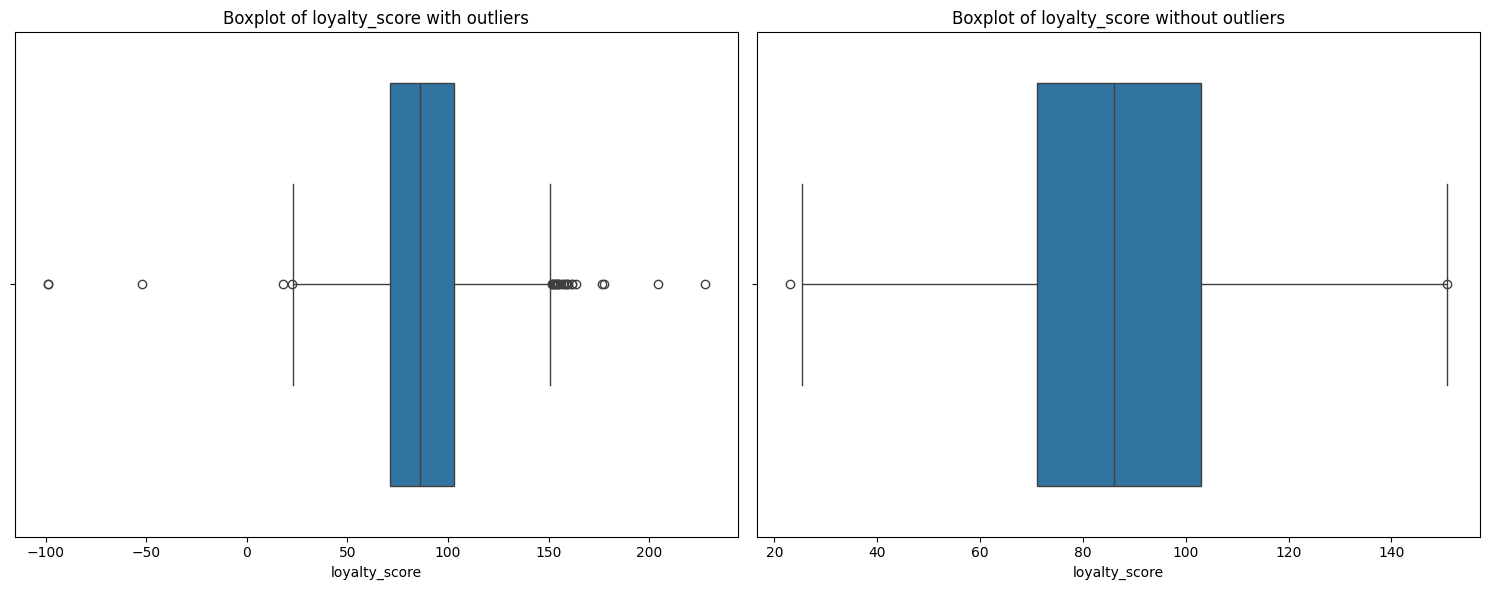

In [43]:
# loyalty_score outliers with boxplot

# Create a boxplot of the 'loyalty_score' column
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['loyalty_score'])
plt.title('Boxplot of loyalty_score with outliers')

# Q1 and Q3
Q1 = df['loyalty_score'].quantile(0.25)
Q3 = df['loyalty_score'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Find the indices of rows where the loyalty_score is an outlier
outlier_indices = df[(df['loyalty_score'] < Q1 - 1.5 * IQR) | (df['loyalty_score'] > Q3 + 1.5 * IQR)].index

# Plot the loyalty_score distribution without outliers
df_no_loyalty_outliers = df.drop(outlier_indices)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_loyalty_outliers['loyalty_score'])
plt.title('Boxplot of loyalty_score without outliers')

plt.tight_layout()
plt.show()


# Matrice de corrélation

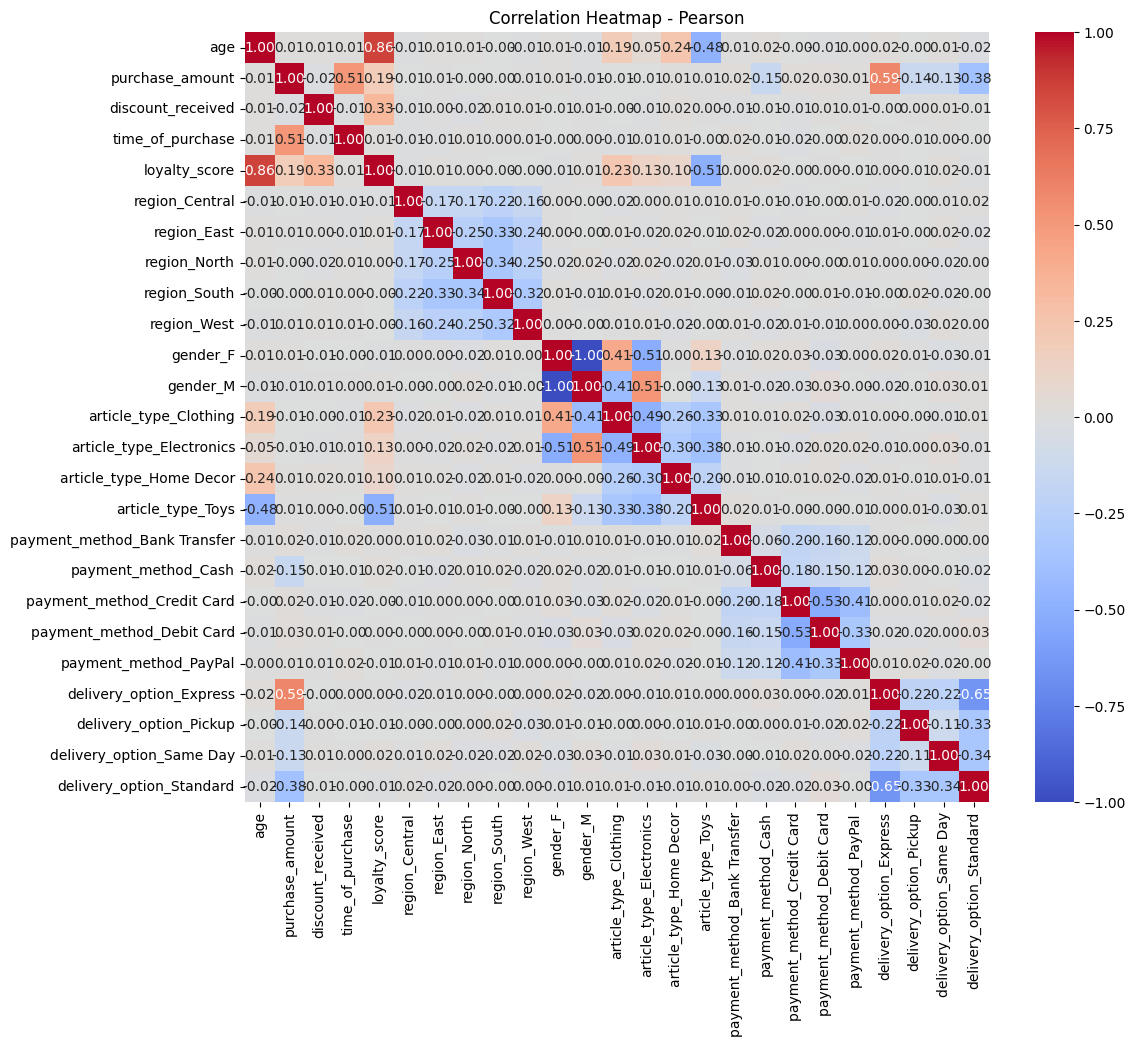

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame structure
# df = pd.DataFrame(...) # Assuming your DataFrame is already loaded

# One-hot encode categorical columns
encoded_df = pd.get_dummies(
    df.drop(columns=["client_id"]),  # Drop client_id
    columns=["region", "gender", "article_type", "payment_method", "delivery_option"],
    # drop_first=True  # Avoid multicollinearity
)

# Compute the correlation matrix
correlation_matrix = encoded_df.corr(method="pearson")
# correlation_matrix = encoded_df.corr(method="spearman") # For Spearman correlation

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap - Pearson")
plt.show()


# Bivariate analysis

### age / loyalty_score

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
X = df[['age']]  # Independent variable (age)
y = df['loyalty_score']  # Dependent variable (loyalty_score)

# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the loyalty scores using the model
y_pred = model.predict(X)

# Example: Predict loyalty score for a specific age
age_to_predict = 35
age_df = pd.DataFrame({'age': [age_to_predict]})
predicted_loyalty_score = model.predict(age_df)

print(f"Predicted loyalty score for age {age_to_predict}: {predicted_loyalty_score[0]}")

Predicted loyalty score for age 35: 80.33458784158333


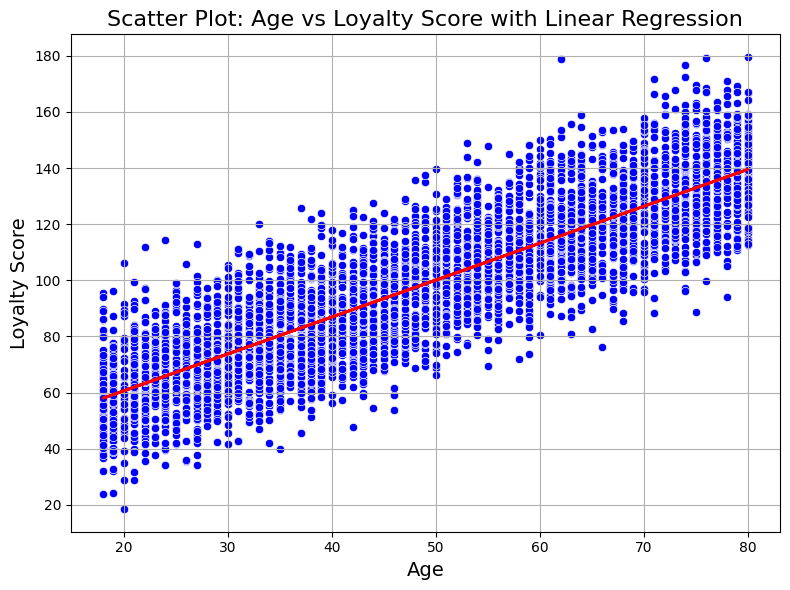

In [5]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='loyalty_score', data=df, color='blue')

# Plot the regression line
plt.plot(df['age'], y_pred, color='red', linewidth=2)

# Add title and labels
plt.title('Scatter Plot: Age vs Loyalty Score with Linear Regression', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Loyalty Score', fontsize=14)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


### Gender / Article Type Analysis

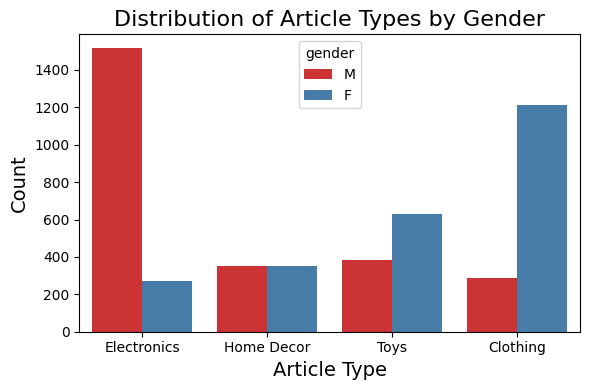

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing 'gender' and 'article_type' columns

plt.figure(figsize=(6, 4))

# Create a count plot for gender and article_type
sns.countplot(x='article_type', hue='gender', data=df, palette='Set1')

# Add title and labels
plt.title('Distribution of Article Types by Gender', fontsize=16)
plt.xlabel('Article Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()


In [7]:
df.columns

Index(['client_id', 'age', 'gender', 'region', 'article_type',
       'purchase_amount', 'discount_received', 'time_of_purchase',
       'payment_method', 'delivery_option', 'loyalty_score'],
      dtype='object')

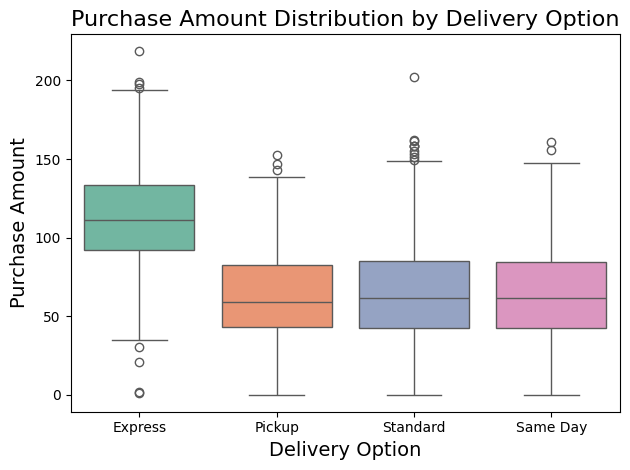

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing 'purchase_amount' and 'delivery_options'

# Create a box plot for purchase_amount and delivery_options
sns.boxplot(x='delivery_option', y='purchase_amount', data=df, hue='delivery_option', palette='Set2')

# Add title and labels
plt.title('Purchase Amount Distribution by Delivery Option', fontsize=16)
plt.xlabel('Delivery Option', fontsize=14)
plt.ylabel('Purchase Amount', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()


### Purchase amount by time of purchase

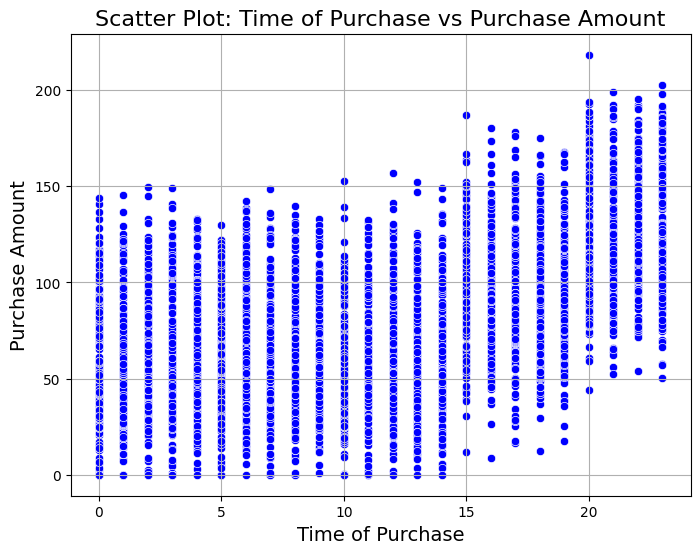

In [9]:
### Purchase amount by time of purchase

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing 'time_of_purchase' and 'purchase_amount' columns

# Create a scatter plot for time_of_purchase and purchase_amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='time_of_purchase', y='purchase_amount', data=df, color='blue')

# Add title and labels
plt.title('Scatter Plot: Time of Purchase vs Purchase Amount', fontsize=16)
plt.xlabel('Time of Purchase', fontsize=14)
plt.ylabel('Purchase Amount', fontsize=14)

# Show plot
plt.grid(True)